In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = {"시간":[9,8,4,2],"성적":[90,80,40,20]}

In [19]:
data = pd.DataFrame(data)

In [20]:
data

,시간,성적
0,9,90
1,8,80
2,4,40
3,2,20


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression()
linear_model.fit(data[['시간']],data['성적'])
# 문제는 여러가지 값이 들어가기 때문에 2차원으로 넣어 줘야 하지만,
# 답은 대부분 하나로 나오기 때문에 1차원으로 넣어준다.

LinearRegression()

In [23]:
#가중치(기울기)
print(linear_model.coef_)
#절편(0과 만나는 점)
print(linear_model.intercept_)

[10.]
-7.105427357601002e-15


In [24]:
# 예측
linear_model.predict([[7]])

array([70.])

##### H(x) = W*X+b

In [25]:
def h(w,x,b):
    return w*x+b

##### 비용함수
- 평균 제곱 오차(MSE)
- 오차들을 제곱해서 평균을 구하는 것

In [26]:
def cost(data,target,weight,intercept):#weight 기울기 intercept 절편
    y_pre = h(weight,data,intercept)
    return((y_pre - target)**2).mean()

In [27]:
# 기울기 10, 절편0
cost(data['시간'],data['성적'],10,0)

0.0

In [29]:
# 기울기 12, 절편 5
cost(data['시간'],data['성적'],12,5)

305.0

#####  수학공식을 위한 해석적 모델
- linear Regressor

##### 경사하강법

In [42]:
weight_arr = range(-10, 31)
weight_arr

range(-10, 31)

In [43]:
cost_list = []
for w in weight_arr:
    c = cost(data['시간'],data['성적'],w,0)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

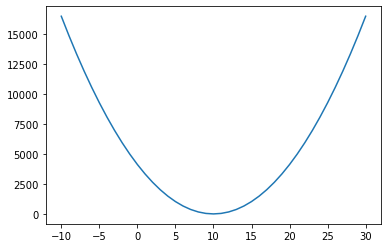

In [41]:

plt.plot(weight_arr,cost_list)

##### SGDRegressor 사용하기

In [44]:
from sklearn.linear_model import SGDRegressor

In [54]:
sgd_model = SGDRegressor(max_iter = 5000, # 가중치업데이트 반복횟수
                         eta0=0.07, # 학습률(learning rate)
                        verbose = 0 # 학습 과정을 확인 할 수 있음
                        ) 

In [55]:
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 7.03, NNZs: 1, Bias: 2.783525, T: 4, Avg. loss: 152.618443
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.72, NNZs: 1, Bias: 3.899849, T: 8, Avg. loss: 951.980584
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.92, NNZs: 1, Bias: 4.261626, T: 12, Avg. loss: 87.229341
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.44, NNZs: 1, Bias: 5.078800, T: 16, Avg. loss: 1230.794740
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.79, NNZs: 1, Bias: 5.639155, T: 20, Avg. loss: 149.869546
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.14, NNZs: 1, Bias: 6.124014, T: 24, Avg. loss: 827.472466
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.02, NNZs: 1, Bias: 6.583659, T: 28, Avg. loss: 110.107460
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 6.44, NNZs: 1, Bias: 6.762664, T: 32, Avg. loss: 328.035117
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds


SGDRegressor(eta0=0.07, max_iter=5000, verbose=1)

In [56]:
sgd_model.predict([[7]])

array([51.82267096])

In [57]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

[6.43714388]
[6.76266382]
